# ✈️ Airplane Crash Visualization Project
**Author:** Devashish Nagpal  

**Dataset:** [Airplane Crashes Since 1908 - Kaggle](https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908)  

**Objective:** To explore and visualize crash trends, survival rates, and operator-based patterns from historical aviation data.


In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

print(" Shape of dataset:", df.shape)
print("\n Column names:")
print(df.columns.tolist())

df.head()

 Shape of dataset: (5268, 13)

 Column names:
['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary']


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [2]:
print("\n Missing Values:")
df.isnull().sum().sort_values(ascending=False)


 Missing Values:


Flight #        4199
Time            2219
Route           1707
cn/In           1228
Summary          390
Registration     335
Type              27
Aboard            22
Ground            22
Location          20
Operator          18
Fatalities        12
Date               0
dtype: int64

In [3]:
# Data Cleaning

df.drop(['Flight #', 'Registration', 'cn/In'], axis=1, inplace=True)

df.dropna(subset=['Aboard', 'Fatalities'], inplace=True)

df['Time'].fillna('Unknown', inplace=True)

def categorize_time(time_str):
    try:
        if time_str == 'Unknown':
            return 'Unknown'
        hour = int(time_str.split(':')[0])
        return 'Day' if 6 <= hour < 18 else 'Night'
    except:
        return 'Unknown'
    
df['Time_of_Day'] = df['Time'].apply(categorize_time)

df['Type'].fillna('Unknown', inplace=True)
df['Operator'].fillna('Unknown', inplace=True)
df['Location'].fillna('Unknown', inplace=True)
df['Ground'] = df['Ground'].fillna(0).astype(int)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()

print("\n Final shape of dataset:", df.shape)
print("\n Missing values after cleaning:")
print(df.isnull().sum().sort_values(ascending=False))


 Final shape of dataset: (5246, 14)

 Missing values after cleaning:
Route          1690
Summary         383
Date              0
Time              0
Location          0
Operator          0
Type              0
Aboard            0
Fatalities        0
Ground            0
Time_of_Day       0
Year              0
Month             0
Weekday           0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_10064\3101495220.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time'].fillna('Unknown', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10064\3101495220.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

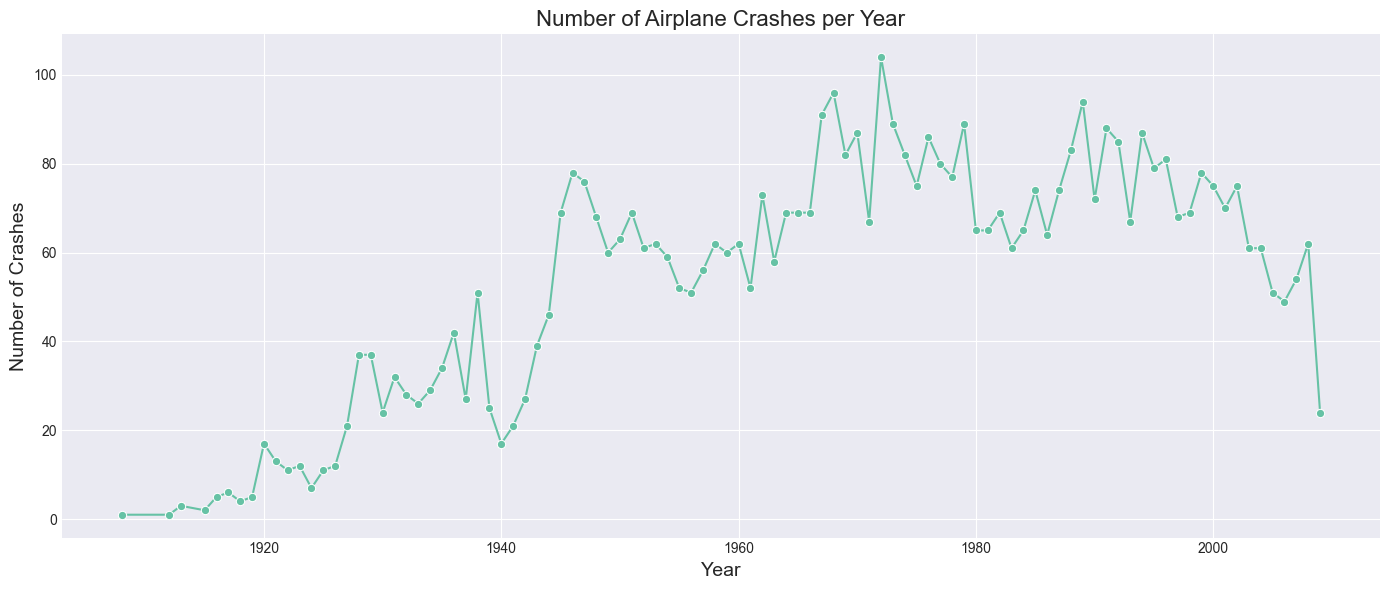

In [4]:
# Plot 1 - 'Yearly Crash Trends'

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')
sns.set_palette('Set2')

crashes_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values, marker='o')
plt.title("Number of Airplane Crashes per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Crashes", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## **Plot 1 - Yearly Crash Trends**

The plot above displays the number of airplane crashes that occurred each year from 1908 onwards. The frequency of crashes steadily increases from the 1920s, peaking in the 1970s and early 1980s. This trend likely reflects the growth of commercial aviation during that period. After the 1990s, the number of crashes declines sharply, suggesting significant improvements in aviation safety, technology, and regulation. The plot effectively illustrates the evolving nature of air travel risk across the 20th and 21st centuries.

C:\Users\HP\AppData\Local\Temp\ipykernel_10064\4283028928.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_fatal['Location'], x=top_fatal['Fatalities'], palette='Reds_r')


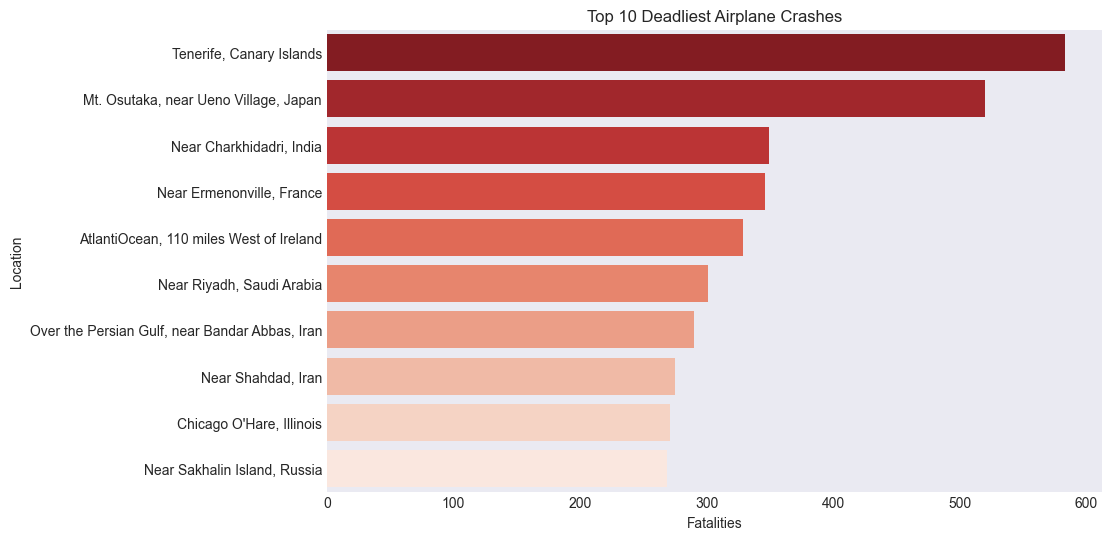

In [5]:
# Plot 2 - 'Top 10 Deadliest Airplane Crashes'

top_fatal = df.sort_values(by='Fatalities', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_fatal['Location'], x=top_fatal['Fatalities'], palette='Reds_r')
plt.title('Top 10 Deadliest Airplane Crashes')
plt.xlabel('Fatalities')
plt.ylabel('Location')
plt.show()


## **Plot 2 - Top 10 Deadliest Airplane Crashes**

This horizontal bar chart highlights the ten deadliest crashes in the dataset, based on total fatalities. These incidents represent catastrophic failures, often involving major commercial airlines and high passenger counts. The visualization is useful for identifying the most severe outliers in aviation history and provides context for the extreme ends of the crash severity spectrum. It also serves as a reminder of how rare but tragic such large-scale events are.

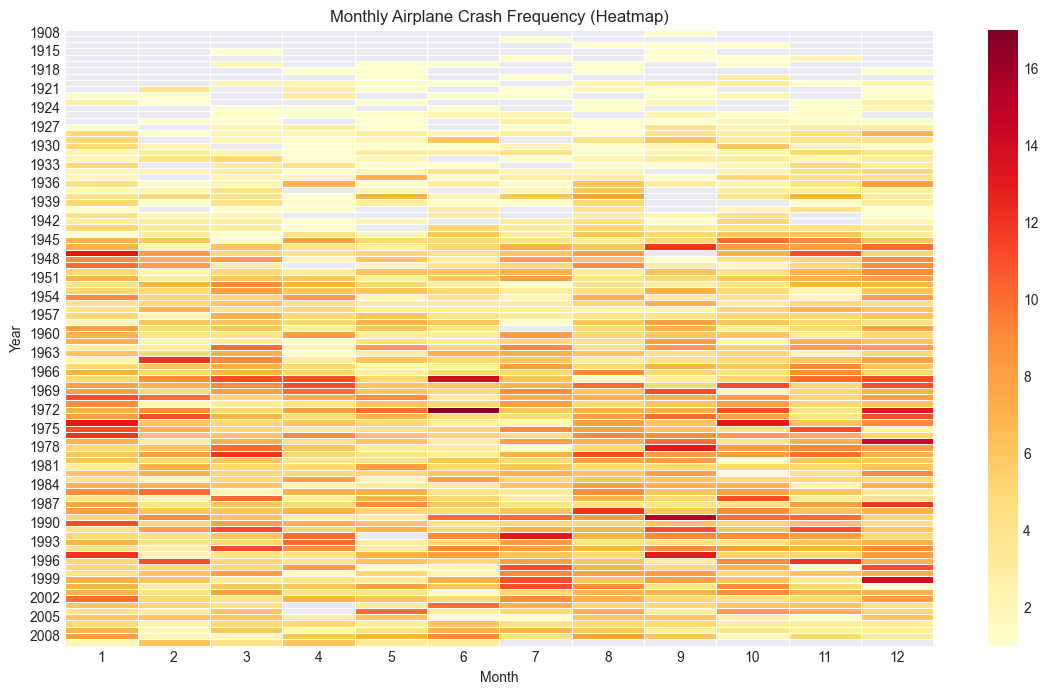

In [6]:
# Plot 3 - 'Heatmap - Crashes by Month and Year'

heatmap_data = df.pivot_table(index='Year', columns='Month', values='Fatalities', aggfunc='count')
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5)
plt.title('Monthly Airplane Crash Frequency (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

## **Plot 3: Heatmap – Crashes by Month and Year**

The heatmap provides a two-dimensional view of how crash incidents are distributed across both months and years. This format helps identify any temporal seasonality in crashes. While yearly variation is prominent, with higher crash counts in certain decades, there is no strong evidence of month-based seasonality. The heatmap visually reinforces the decline in crashes after the 1980s and adds a new dimension of temporal analysis to the trends.

C:\Users\HP\AppData\Local\Temp\ipykernel_10064\383546248.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_ops.index, x=top_ops.values, palette='mako')


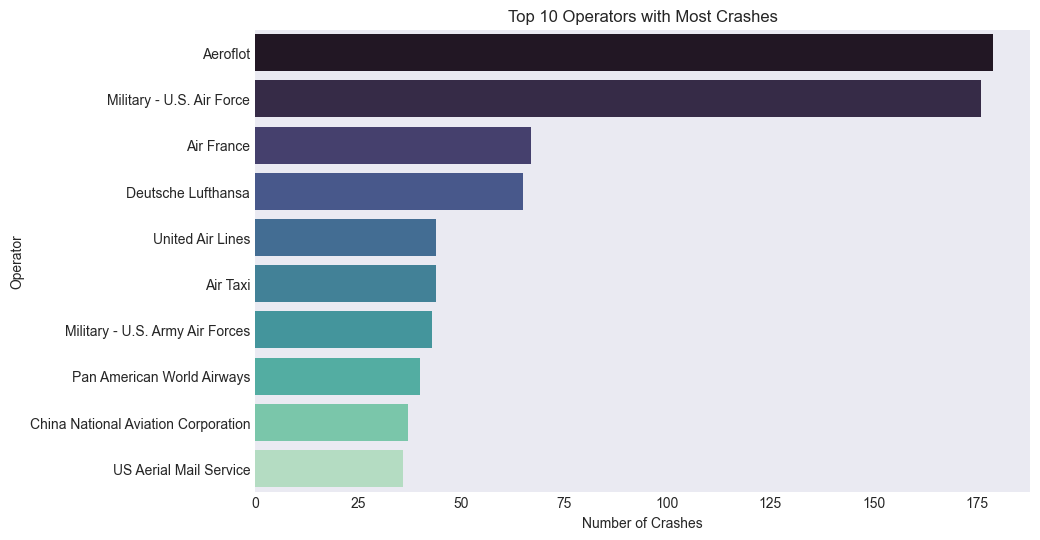

In [7]:
# Plot 4 - 'Operator-wise Crash Count'

top_ops = df['Operator'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_ops.index, x=top_ops.values, palette='mako')
plt.title('Top 10 Operators with Most Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Operator')
plt.show()

## **Plot 4: Operator-wise Crash Count**

This plot shows which airline operators have had the most crashes recorded in the dataset. Operators such as military forces and early commercial airlines dominate the list, as expected from a dataset spanning over a century. This plot helps identify which organizations or sectors (civil, military) were most frequently involved in aviation incidents, which can be due to a combination of fleet size, years of operation, or historical wartime activity.


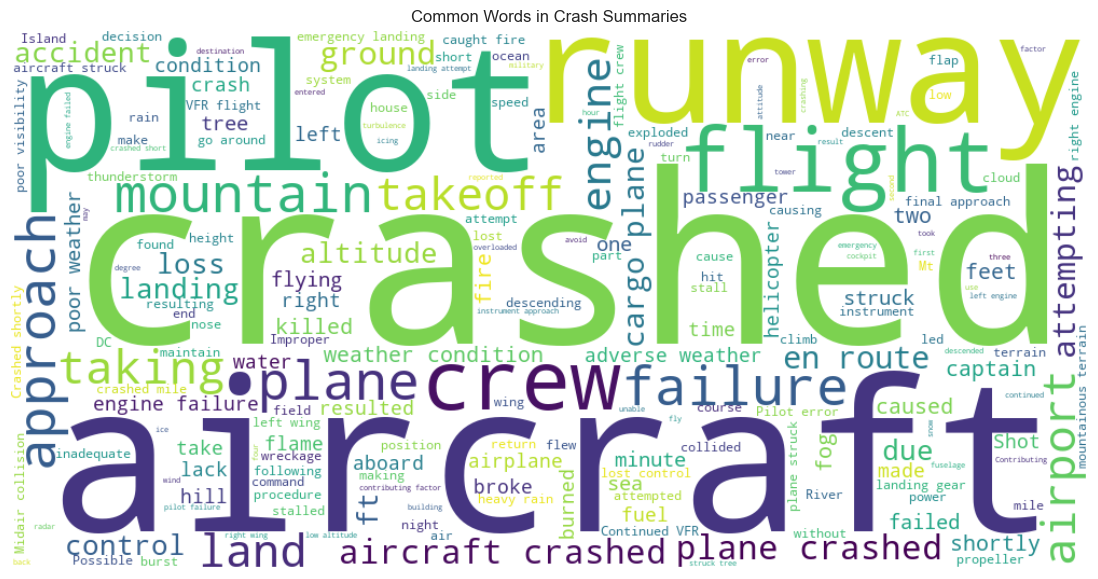

In [8]:
# Plot 5 - Word Cloud of Crash Locations

from wordcloud import WordCloud

text = ' '.join(df['Summary'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Crash Summaries")
plt.show()

## **Plot 5: Word Cloud of Crash Locations**

The word cloud visualizes the most common locations where airplane crashes have occurred. Larger fonts indicate higher frequency. This plot serves as a quick glance at geographical patterns without diving into specific coordinates or mapping. Prominent city and country names suggest areas with denser air traffic or historical significance in aviation. It adds a visually appealing textual summary of spatial patterns in crash data.


# **Reflection**

This assignment allowed me to explore a historical and impactful dataset while applying key data analysis and visualization skills. Working with real-world data highlighted challenges such as handling missing values, parsing non-standard time formats, and engineering meaningful features from date columns.

I particularly focused on extracting insights that were not immediately visible through basic plots. Creating a diverse set of visualizations — from temporal trends and bar charts to heatmaps and word clouds — deepened my understanding of how to choose appropriate visual tools based on the story I wanted to tell.

Overall, this project strengthened my EDA skills and gave me a valuable opportunity to analyze aviation history through a data-driven lens. I also practiced explaining insights in a concise and structured manner, which is an essential skill in any data science role.
